In [ ]:
# !pip install yfinance

In [ ]:
import datetime as dt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf  
end = dt.today()
start = dt.today() - relativedelta(years=20)
data = yf.download('SBIN.NS', start, end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-03,541.900024,546.400024,534.650024,540.849976,540.849976,24262125
2022-08-04,543.650024,544.000000,524.200012,533.250000,533.250000,18072293
2022-08-05,535.549988,542.900024,529.000000,531.049988,531.049988,21110734
2022-08-08,524.000000,524.000000,513.849976,520.400024,520.400024,32566317
2022-08-10,521.549988,523.500000,513.400024,514.700012,514.700012,16899864


In [ ]:
data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,21.908552,22.116129,21.804766,21.861378,16.777514,2002838


In [ ]:
data.size

29814

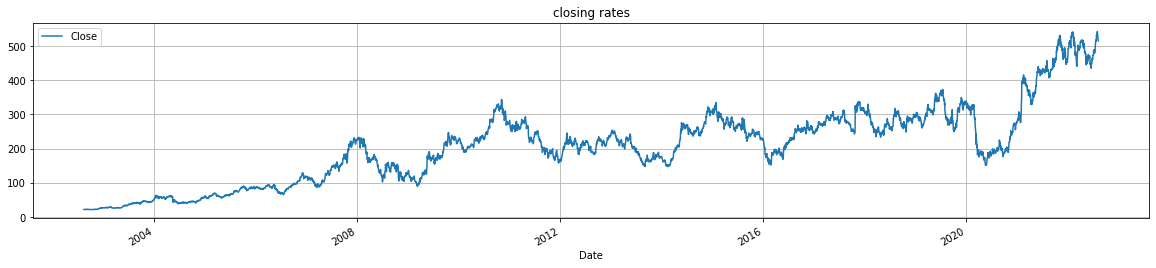

In [ ]:
import matplotlib.pyplot as plt
data.plot(y = 'Close',figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('closing rates')
plt.show(block=False)

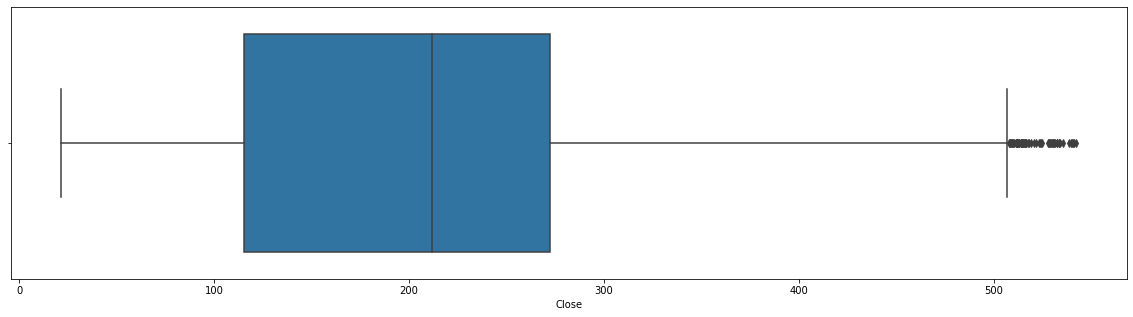

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data['Close'],whis=1.5)

In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
import pandas as pd
data.reset_index(inplace = True)
data = data.rename(columns={'Close': 'y'})
X = pd.DataFrame(data["Date"])
y = data['y']

In [ ]:
X

,Date
0,2002-08-12
1,2002-08-13
2,2002-08-14
3,2002-08-15
4,2002-08-16
...,...
4964,2022-08-03
4965,2022-08-04
4966,2022-08-05
4967,2022-08-08


In [ ]:
import numpy as np
y_train, y_test= np.split(y, [int(.8 *len(y))])
X_train, X_test= np.split(X, [int(.8 *len(X))])

In [ ]:
import plotly.graph_objects as go

data = [
    go.Scatter(
        x=X_train["Date"],
        y=y_train,
        mode="lines+markers",
        name="closing price",
        line=dict(color="#1f77b4"),
    )
]
# Let plotly pick the best date format.
layout = go.Layout(
    title={"text": "share market closing price data SBI(10/08/2021 - 10/08/2022)"},
    xaxis={"title": "Time"},
    yaxis={"title": "closing price"},
)
 
go.Figure(data=data, layout=layout)

In [ ]:
# !pip install evalml

In [ ]:
from evalml.automl import AutoMLSearch

In [ ]:
import evalml

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [ ]:
problem_config = {"gap": 0, "max_delay": 7, "forecast_horizon": 15, "time_index": "Date"}
 
automl = AutoMLSearch(X_train, y_train, problem_type="time series regression",
                      max_batches=1,
                      problem_configuration=problem_config,
                      allowed_model_families=["xgboost", "random_forest", "linear_model", "extra_trees"]
                      )

/usr/local/lib/python3.7/dist-packages/evalml/automl/automl_search.py:475: UserWarning:

Time series support in evalml is still in beta, which means we are still actively building its core features. Please be mindful of that when running search().



In [ ]:
automl.search()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.668e+03, tolerance: 4.107e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+05, tolerance: 7.940e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.106e+05, tolerance: 1.844e+03



In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,0,Time Series Baseline Regression Pipeline,0,11.797404,1.901922,11.797404,0.000000,False,{'Time Series Featurizer': {'time_index': 'Dat...
1,1,Elastic Net Regressor w/ Imputer + Time Series...,1,13.352905,2.104782,13.352905,-13.185113,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Extra Trees Regressor w/ Imputer + Time Series...,4,34.753280,30.014492,34.753280,-194.584128,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,XGBoost Regressor w/ Imputer + Time Series Fea...,2,37.246483,31.445029,37.246483,-215.717618,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,3,Random Forest Regressor w/ Imputer + Time Seri...,3,38.686032,28.468767,38.686032,-227.919868,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [ ]:
baseline = automl.get_pipeline(0)
baseline.fit(X_train, y_train)
naive_baseline_preds = baseline.predict_in_sample(X_test, y_test, objective=None,
                                                  X_train=X_train, y_train=y_train)
expected_preds = pd.concat([y_train.iloc[-7:], y_test]).shift(7).iloc[7:]

In [ ]:
# pd.testing.assert_series_equal(expected_preds, naive_baseline_preds)

In [ ]:
pipeline = automl.best_pipeline
 
pipeline.fit(X_train, y_train)
 
temp_ordered_dict = pipeline.score(X_test, y_test, ['MedianAE'], X_train, y_train)
# print(type(temp))
best_pipeline_score = temp_ordered_dict['MedianAE']
print("the best pipeline's score is:", best_pipeline_score)

the best pipeline's score is: 18.975006103515625


In [ ]:
from evalml.model_understanding import graph_prediction_vs_actual_over_time
 
plot = graph_prediction_vs_actual_over_time(pipeline, X_test, y_test, X_train, y_train, dates=X_test['Date'])
plot

In [ ]:
Pred = pipeline.predict(X_test.iloc[:pipeline.forecast_horizon], objective=None, X_train=X_train, y_train=y_train)
Pred

3975    263.750000
3976    259.100006
3977    262.750000
3978    257.750000
3979    251.600006
3980    259.049988
3981    259.549988
3982    260.200012
3983    261.500000
3984    266.350006
3985    266.850006
3986    271.850006
3987    287.700012
3988    286.750000
3989    297.399994
Name: y, dtype: float64

<AxesSubplot:>

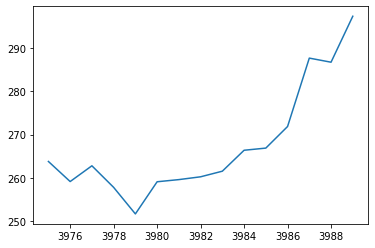

In [ ]:
Pred.plot()